In [73]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

import test_objective as TO
import test_subjective as TS
from utils.wav_utils import read_wav

# Pruebas para comparar nuestra implementación y las de referencia

In [74]:
fs = 22050
alpha = 0.7
cfg1 = {"N": 8192, "Hs": 8192//4, "alpha": alpha, "fs": 22050}
cfg2 = {"N": 8192, "Hs": 8192//2, "alpha": alpha, "fs": 22050}
cfg3 = {"N": 4096, "Hs": 4096//2, "alpha": alpha, "fs": 22050}
cfg4 = {"N": 4096, "Hs": 4096//4, "alpha": alpha, "fs": 22050}
cfg5 = {"N": 4096, "Hs": 4096//8, "alpha": alpha, "fs": 22050}
cfg6 = {"N": 2048, "Hs": 2048//4, "alpha": alpha, "fs": 22050}
cfg7 = {"N": 1024, "Hs": 1024//4, "alpha": alpha, "fs": 22050}
cfg8 = {"N": 512, "Hs": 512//4, "alpha": alpha, "fs": 22050}
cfg_ola = {"N": 1024, "Hs": 1024//2, "alpha": alpha}

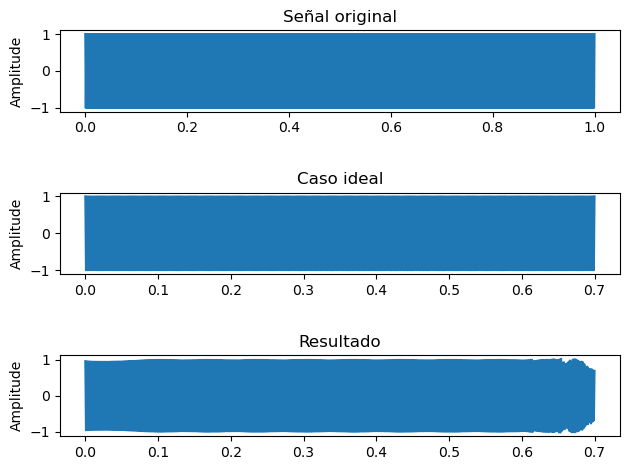

In [75]:
f_analysis = 500
config = cfg4
algorithm = "PV_REF"
x_base, x_ideal, x_result = TO.test_ideal_signal(algo=algorithm, f0=f_analysis, fs=fs, config=config, 
                                                 plot=True, audio_save=False, return_audios=True)

In [76]:
path_audio = "..\\audios\\sharp_bells.wav"
test = [["PV", cfg4, "PV1"], ["PV_REF", cfg4, "PV2"],["PV", cfg6, "PV3"]]

x1, x2, x3 = TS.compare_algorithms(path_audio, test, plot=False, save_audios=False, return_audios=True)

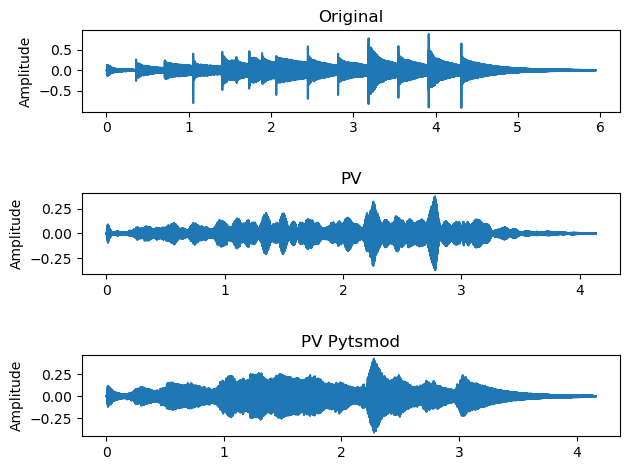

In [77]:
from test.plotting import compare_results

fs = 22050
x_b, _ = read_wav(path_audio, fs, mono=
                 True)

titles = ["Original", "PV", "PV Pytsmod"]

compare_results(fs, titles, x_b, x1, x2)

In [78]:
from pytsmod import hptsm

path_audio = "..\\audios\\sharp_bells.wav"
x, _ = read_wav(path_audio, fs, mono=True)

hps_good = {"N":1024, "M":17}
config_hps = [cfg_ola, cfg4, hps_good]

test = [["HPS", config_hps, "PV1"], ["SIN_M", cfg6, "PV2"],["PV", cfg6, "PV3"]]
hps_ref = hptsm(x, alpha)


x1, x2, x3 = TS.compare_algorithms(path_audio, test, plot=False, save_audios=False, return_audios=True)

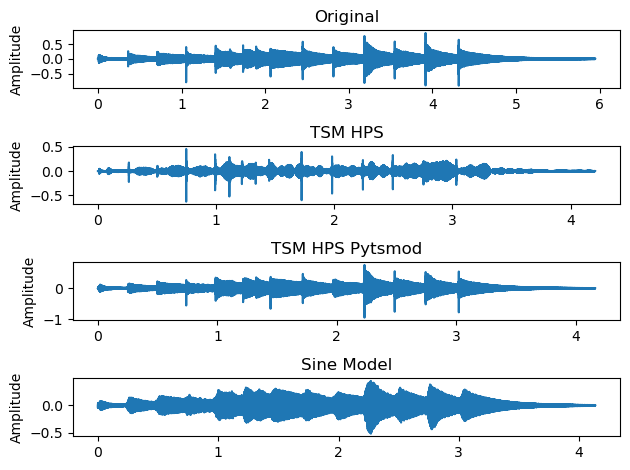

In [79]:
titles = ["Original", "TSM HPS", "TSM HPS Pytsmod", "Sine Model"]

compare_results(fs, titles, x, x1, hps_ref, x2)

In [80]:
Audio(x1, rate=fs)

In [81]:
Audio(hps_ref, rate=fs)

In [82]:
Audio(x2, rate=fs)

# Pruebas de comparación entre nuestros algoritmos

In [83]:
path_audio = "..\\audios\\synth.wav"
x, _ = read_wav(path_audio, fs, mono=True)

hps_good = {"N":1024, "M":21}
config_hps = [cfg_ola, cfg1, hps_good]

test = [["HPS", config_hps, "PV1"], ["OLA", cfg_ola, "PV2"],["PV", cfg4, "PV3"]]

x1, x2, x3 = TS.compare_algorithms(path_audio, test, plot=False, save_audios=False, return_audios=True)

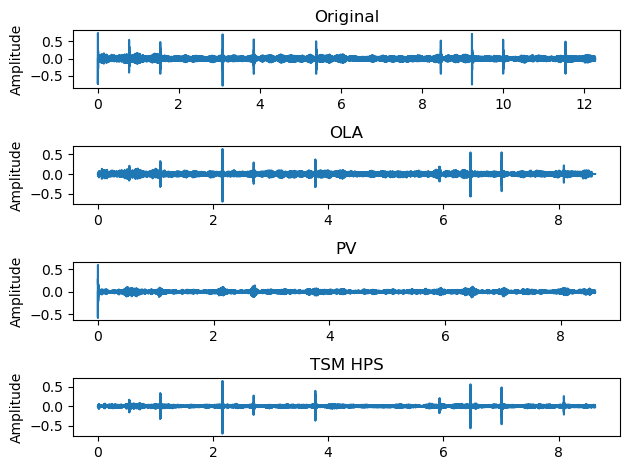

In [84]:
title = ["Original", "OLA", "PV", "TSM HPS"]
compare_results(fs, title, x, x2, x3, x1)

In [85]:
Audio(x2, rate=fs)  #OLA

In [86]:
Audio(x1, rate=fs)  #HPS

In [87]:
Audio(x3, rate=fs)  #PV